201812 2018 evaluation vs GRL dataset

In [73]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [74]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [75]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import cmocean
import glob
import seawater
""
# import salishsea_tools
# from salishsea_tools import (
#     nc_tools,
#     viz_tools,
#     geo_tools,
#     tidetools
# )

# %matplotlib inline


''

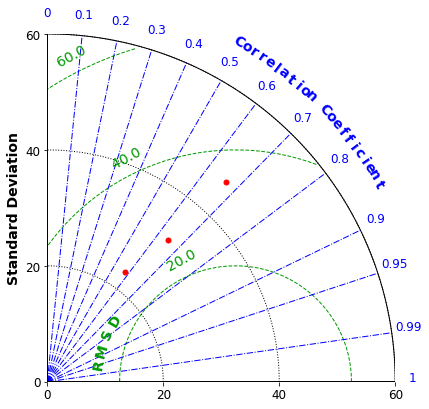

In [76]:
'''
How to create a simple Taylor diagram
A first example of how to create a simple Taylor diagram given one set of
reference observations and multiple model predictions for the quantity.
The Python code is kept to a minimum.
This example shows how to calculate the required statistics and produce
the Taylor diagram.
All functions in the Skill Metrics library are designed to only work with
one-dimensional arrays, e.g. time series of observations at a selected
location. The one-dimensional data are read in as dictionaries via a 
pickle file: ref['data'], pred1['data'], pred2['data'], 
and pred3['data']. The plot is written to a file in Portable Network 
Graphics (PNG) format.
The reference data used in this example are cell concentrations of a
phytoplankton collected from cruise surveys at selected locations and 
time. The model predictions are from three different simulations that
have been space-time interpolated to the location and time of the sample
collection. Details on the contents of the dictionary (once loaded) can 
be obtained by simply executing the following two statements
>> key_to_value_lengths = {k:len(v) for k, v in ref.items()}
>> print key_to_value_lengths
{'units': 6, 'longitude': 57, 'jday': 57, 'date': 57, 'depth': 57, 
'station': 57, 'time': 57, 'latitude': 57, 'data': 57}
Author: Peter A. Rochford
        Symplectic, LLC
        www.thesymplectic.com
Created on Dec 3, 2016
@author: prochford@thesymplectic.com
'''

import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pickle
import skill_metrics as sm
from sys import version_info

def load_obj(name):
    # Load object from file in pickle format
    if version_info[0] == 2:
        suffix = 'pkl'
    else:
        suffix = 'pkl3'

    with open(name + '.' + suffix, 'rb') as f:
        return pickle.load(f) # Python2 succeeds

class Container(object): 
    
    def __init__(self, pred1, pred2, pred3, ref):
        self.pred1 = pred1
        self.pred2 = pred2
        self.pred3 = pred3
        self.ref = ref
        
if __name__ == '__main__':

    # Set the figure properties (optional)
    rcParams["figure.figsize"] = [8.0, 6.4]
    rcParams['lines.linewidth'] = 1 # line width for plots
    rcParams.update({'font.size': 12}) # font size of axes text
    
    # Close any previously open graphics windows
    # ToDo: fails to work within Eclipse
    plt.close('all')

    # Read data from pickle file
    data = load_obj('taylor_data')

    # Calculate statistics for Taylor diagram
    # The first array element (e.g. taylor_stats1[0]) corresponds to the 
    # reference series while the second and subsequent elements
    # (e.g. taylor_stats1[1:]) are those for the predicted series.
    taylor_stats1 = sm.taylor_statistics(data.pred1,data.ref,'data')
    taylor_stats2 = sm.taylor_statistics(data.pred2,data.ref,'data')
    taylor_stats3 = sm.taylor_statistics(data.pred3,data.ref,'data')
    
    # Store statistics in arrays
    sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                     taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
    crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                      taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
    ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                      taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])

    '''
    Produce the Taylor diagram
    Note that the first index corresponds to the reference series for 
    the diagram. For example sdev[0] is the standard deviation of the 
    reference series and sdev[1:4] are the standard deviations of the 
    other 3 series. The value of sdev[0] is used to define the origin 
    of the RMSD contours. The other values are used to plot the points 
    (total of 3) that appear in the diagram.
    For an exhaustive list of options to customize your diagram, 
    please call the function at a Python command line:
    >> taylor_diagram
    '''
    sm.taylor_diagram(sdev,crmsd,ccoef)

    # Write plot to file
    plt.savefig('taylor1.png')

    # Show plot
    plt.show()

## example 5 

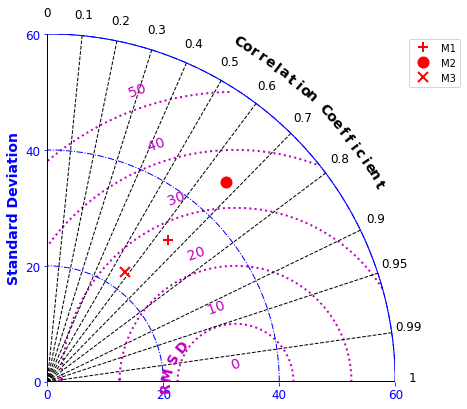

In [77]:

'''
How to create a Taylor diagram with a legend plus suppressed axes titles
A fifth example of how to create a Taylor diagram given one set of
reference observations and multiple model predictions for the quantity.
This example is a variation on the fourth example (taylor4) where now a
legend is added, and axes titles are suppressed. Note that symbols are
used for the points when requesting a legend.
All functions in the Skill Metrics library are designed to only work with
one-dimensional arrays, e.g. time series of observations at a selected
location. The one-dimensional data are read in as dictionaries via a 
pickle file: ref['data'], pred1['data'], pred2['data'], 
and pred3['data']. The plot is written to a file in Portable Network 
Graphics (PNG) format.
The reference data used in this example are cell concentrations of a
phytoplankton collected from cruise surveys at selected locations and 
time. The model predictions are from three different simulations that
have been space-time interpolated to the location and time of the sample
collection. Details on the contents of the dictionary (once loaded) can 
be obtained by simply executing the following two statements
>> key_to_value_lengths = {k:len(v) for k, v in ref.items()}
>> print key_to_value_lengths
{'units': 6, 'longitude': 57, 'jday': 57, 'date': 57, 'depth': 57, 
'station': 57, 'time': 57, 'latitude': 57, 'data': 57}
Author: Peter A. Rochford
        Symplectic, LLC
        www.thesymplectic.com
Created on Dec 6, 2016
@author: prochford@thesymplectic.com
'''

import matplotlib.pyplot as plt
import numpy as np
import pickle
import skill_metrics as sm
from sys import version_info

def load_obj(name):
    # Load object from file in pickle format
    if version_info[0] == 2:
        suffix = 'pkl'
    else:
        suffix = 'pkl3'

    with open(name + '.' + suffix, 'rb') as f:
        return pickle.load(f) # Python2 succeeds

class Container(object): 
    
    def __init__(self, pred1, pred2, pred3, ref):
        self.pred1 = pred1
        self.pred2 = pred2
        self.pred3 = pred3
        self.ref = ref
        
if __name__ == '__main__':
    
    # Close any previously open graphics windows
    # ToDo: fails to work within Eclipse
    plt.close('all')
        
    # Read data from pickle file
    data = load_obj('taylor_data')

    # Calculate statistics for Taylor diagram
    # The first array element (e.g. taylor_stats1[0]) corresponds to the 
    # reference series while the second and subsequent elements
    # (e.g. taylor_stats1[1:]) are those for the predicted series.
    taylor_stats1 = sm.taylor_statistics(data.pred1,data.ref,'data')
    taylor_stats2 = sm.taylor_statistics(data.pred2,data.ref,'data')
    taylor_stats3 = sm.taylor_statistics(data.pred3,data.ref,'data')
    
    # Store statistics in arrays
    sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                     taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
    crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                      taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
    ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                      taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])

    # Specify labels for points in a cell array (M1 for model prediction 1,
    # etc.). Note that a label needs to be specified for the reference even
    # though it is not used.
    label = ['Non-Dimensional Observation', 'M1', 'M2', 'M3']
    
    '''
    Produce the Taylor diagram
    Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
    Increase the upper limit for the SDEV axis and rotate the CRMSD contour 
    labels (counter-clockwise from x-axis). Exchange color and line style
    choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
    the line width of all lines. Suppress axes titles and add a legend.
    For an exhaustive list of options to customize your diagram, 
    please call the function at a Python command line:
    >> taylor_diagram
    '''
    sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                      markerLabelColor = 'r', 
                      markerColor = 'r', markerLegend = 'on', 
                      tickRMS = range(0,60,10), tickRMSangle = 110.0,
                      colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                      titleRMS = 'on', tickSTD = range(0,80,20), 
                      axismax = 60.0, colSTD = 'b', styleSTD = '-.', 
                      widthSTD = 1.0, titleSTD = 'on', 
                      colCOR = 'k', styleCOR = '--', widthCOR = 1.0, 
                      titleCOR = 'on')

    # Write plot to file

    #plt.savefig('taylor5.png')

    # Show plot
    plt.show()


# load Ianson et al obs. dataset

In [78]:
infil = loadtxt('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/DATASETS/grl2016_edit2.txt')
infil_cor = loadtxt('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/DATASETS/grl2016_nu.txt')
crid= infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
mon = infil[:,4]
day = infil[:,5]
lat_or = infil[:,6]
lon_or = infil[:,7]
lat = infil_cor[:,6]
lon = infil_cor[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
ox = infil[:,11]
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:, 20]
po4 = infil[:,21]
po4_qf = infil[:, 22]

dens = seawater.dens(S,T,P)
dic_conv=dic*dens/1000
alk_conv=alk*dens/1000

S_rs = S * 35.16504/35



In [79]:
##changeable variables
scrdir = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/pyscripts/MODEL_EVAL_scripts/'
DIC16 = nc.Dataset(scrdir+'/DIC_BR2016_modeloutput_for_GRL_comparison.nc')
TA16 = nc.Dataset(scrdir+'/TA_BR2016_modeloutput_for_GRL_comparison.nc')
sal16 = nc.Dataset(scrdir+'/sal_BR2016_modeloutput_for_GRL_comparison.nc')

DIC_mod16 = DIC16['model_output']['mod_point'][:]
is_ref = DIC16['model_output']['mod_x'][:]
js_ref = DIC16['model_output']['mod_y'][:]

TA_mod16 = TA16['model_output']['mod_point'][:]
is_ref2 = TA16['model_output']['mod_x'][:]
js_ref2 = TA16['model_output']['mod_y'][:]

sal_mod16 = sal16['model_output']['mod_point'][:]
is_ref4 = sal16['model_output']['mod_x'][:]
js_ref4 = sal16['model_output']['mod_y'][:]

DIC_mod16[DIC_mod16==0]=np.nan

#DIC
dic_compbl = dic_conv[~(np.isnan(DIC_mod16))]
DIC_mod16_compbl = DIC_mod16[~(np.isnan(DIC_mod16))]

#salinity
sal_compbl = S_rs[~(np.isnan(DIC_mod16))]
sal_mod16_compbl = sal_mod16[~(np.isnan(DIC_mod16))]

#ta
alk_compbl = alk_conv[~(np.isnan(DIC_mod16))]
TA_mod16_compbl = TA_mod16[~(np.isnan(DIC_mod16))]

##
##changeable variables
scrdir = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/pyscripts/MODEL_EVAL_scripts/'
DIC15 = nc.Dataset(scrdir+'/DIC_BR2015_modeloutput_for_GRL_comparison.nc')
TA15 = nc.Dataset(scrdir+'/TA_BR2015_modeloutput_for_GRL_comparison.nc')
sal15 = nc.Dataset(scrdir+'/sal_BR2015_modeloutput_for_GRL_comparison.nc')

DIC_mod15 = DIC15['model_output']['mod_point'][:]
is_ref = DIC15['model_output']['mod_x'][:]
js_ref = DIC15['model_output']['mod_y'][:]

TA_mod15 = TA15['model_output']['mod_point'][:]
is_ref2 = TA15['model_output']['mod_x'][:]
js_ref2 = TA15['model_output']['mod_y'][:]

sal_mod15 = sal15['model_output']['mod_point'][:]
is_ref4 = sal15['model_output']['mod_x'][:]
js_ref4 = sal15['model_output']['mod_y'][:]

DIC_mod15[DIC_mod15==0]=np.nan

#DIC
dic_compbl = dic_conv[~(np.isnan(DIC_mod15))]
DIC_mod15_compbl = DIC_mod15[~(np.isnan(DIC_mod15))]

#salinity
sal_compbl = S_rs[~(np.isnan(DIC_mod15))]
sal_mod15_compbl = sal_mod15[~(np.isnan(DIC_mod15))]

#ta
alk_compbl = alk_conv[~(np.isnan(DIC_mod15))]
TA_mod15_compbl = TA_mod15[~(np.isnan(DIC_mod15))]



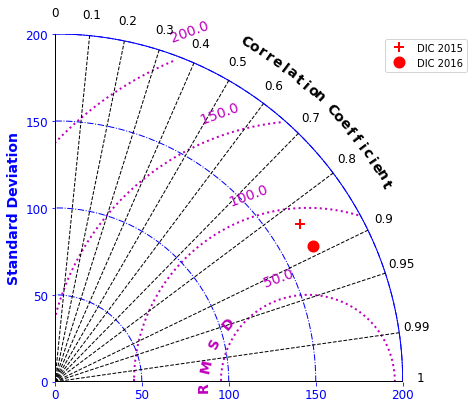

In [80]:

## what

taylor_statsDIC15 = sm.taylor_statistics(dic_compbl,DIC_mod15_compbl,'data')
taylor_statsDIC16 = sm.taylor_statistics(dic_compbl,DIC_mod16_compbl,'data')


# Store statistics in arrays
sdev = np.array([taylor_statsDIC15['sdev'][0], taylor_statsDIC15['sdev'][1],
                 taylor_statsDIC16['sdev'][1]])#, taylor_stats3['sdev'][1]])
crmsd = np.array([taylor_statsDIC15['crmsd'][0], taylor_statsDIC15['crmsd'][1],
                 taylor_statsDIC16['crmsd'][1]])
ccoef = np.array([taylor_statsDIC15['ccoef'][0], taylor_statsDIC15['ccoef'][1],
                 taylor_statsDIC16['ccoef'][1]])

# Specify labels for points in a cell array (M1 for model prediction 1,
# etc.). Note that a label needs to be specified for the reference even
# though it is not used.
label = ['Non-Dimensional Observation', 'DIC 2015', 'DIC 2016'] #'M3']

'''
Produce the Taylor diagram
Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
Increase the upper limit for the SDEV axis and rotate the CRMSD contour 
labels (counter-clockwise from x-axis). Exchange color and line style
choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
the line width of all lines. Suppress axes titles and add a legend.
For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                  markerLabelColor = 'r', 
                  markerColor = 'r', markerLegend = 'on', 
                  tickRMSangle = 110.0,
                  colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                  titleRMS = 'on',  colSTD = 'b', styleSTD = '-.', 
                  widthSTD = 1.0, titleSTD = 'on', 
                  colCOR = 'k', styleCOR = '--', widthCOR = 1.0, 
                  titleCOR = 'on')

plt.show()

In [81]:
alk_compbl2 = alk_compbl[~np.isnan(alk_compbl)]
print(np.shape(alk_compbl2))
print(np.shape(TA_mod15_compbl))
TA_mod15_compbl2 = TA_mod15_compbl[~np.isnan(alk_compbl)]
print(np.shape(TA_mod15_compbl2))
TA_mod16_compbl2 = TA_mod16_compbl[~np.isnan(alk_compbl)]
print(np.shape(TA_mod16_compbl2))
# TA_mod16_compbl2 = TA_mod16_compbl[~np.isnan(alk_compbl)]
# print(np.shape(alk_compbl2))
# print(np.shape(TA_mod15_compbl2))

(465,)
(466,)
(465,)
(465,)


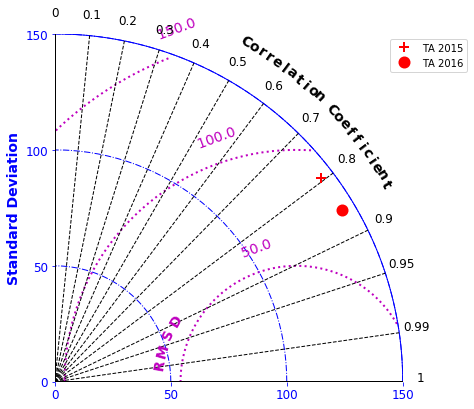

In [82]:
# alk_compbl2 = alk_compbl[~np.isnan(alk_compbl)]
# TA_mod15_compbl = TA_mod15_compbl[~np.isnan(alk_compbl)]


## what

taylor_statsTA15 = sm.taylor_statistics(alk_compbl2,TA_mod15_compbl2,'data')
taylor_statsTA16 = sm.taylor_statistics(alk_compbl2,TA_mod16_compbl2,'data')


# Store statistics in arrays
sdev = np.array([taylor_statsTA15['sdev'][0], taylor_statsTA15['sdev'][1],
                 taylor_statsTA16['sdev'][1]])#, taylor_stats3['sdev'][1]])
crmsd = np.array([taylor_statsTA15['crmsd'][0], taylor_statsTA15['crmsd'][1],
                 taylor_statsTA16['crmsd'][1]])
ccoef = np.array([taylor_statsTA15['ccoef'][0], taylor_statsTA15['ccoef'][1],
                 taylor_statsTA16['ccoef'][1]])

# Specify labels for points in a cell array (M1 for model preTAtion 1,
# etc.). Note that a label needs to be specified for the reference even
# though it is not used.
label = ['Non-Dimensional Observation', 'TA 2015', 'TA 2016'] #'M3']

'''
Produce the Taylor diagram
Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
Increase the upper limit for the SDEV axis and rotate the CRMSD contour 
labels (counter-clockwise from x-axis). Exchange color and line style
choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
the line width of all lines. Suppress axes titles and add a legend.
For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                  markerLabelColor = 'r', 
                  markerColor = 'r', markerLegend = 'on', 
                  tickRMSangle = 110.0,
                  colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                  titleRMS = 'on',  colSTD = 'b', styleSTD = '-.', 
                  widthSTD = 1.0, titleSTD = 'on', 
                  colCOR = 'k', styleCOR = '--', widthCOR = 1.0, 
                  titleCOR = 'on')

plt.show()

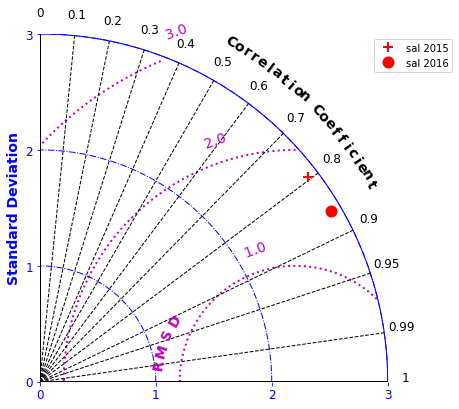

In [88]:

## what

taylor_statssal15 = sm.taylor_statistics(sal_compbl,sal_mod15_compbl,'data')
taylor_statssal16 = sm.taylor_statistics(sal_compbl,sal_mod16_compbl,'data')


# Store statistics in arrays
sdev = np.array([taylor_statssal15['sdev'][0], taylor_statssal15['sdev'][1],
                 taylor_statssal16['sdev'][1]])#, taylor_stats3['sdev'][1]])
crmsd = np.array([taylor_statssal15['crmsd'][0], taylor_statssal15['crmsd'][1],
                 taylor_statssal16['crmsd'][1]])
ccoef = np.array([taylor_statssal15['ccoef'][0], taylor_statssal15['ccoef'][1],
                 taylor_statssal16['ccoef'][1]])

# Specify labels for points in a cell array (M1 for model presaltion 1,
# etc.). Note that a label needs to be specified for the reference even
# though it is not used.
label = ['Non-Dimensional Observation', 'sal 2015', 'sal 2016'] #'M3']

'''
Produce the Taylor diagram
Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
Increase the upper limit for the SDEV axis and rotate the CRMSD contour 
labels (counter-clockwise from x-axis). Exchange color and line style
choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
the line width of all lines. Suppress axes titles and add a legend.
For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                  markerLabelColor = 'r', 
                  markerColor = 'r', markerLegend = 'on', 
                  tickRMSangle = 110.0,
                  colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                  titleRMS = 'on',  colSTD = 'b', styleSTD = '-.', 
                  widthSTD = 1.0, titleSTD = 'on', 
                  colCOR = 'k', styleCOR = '--', widthCOR = 1.0, 
                  titleCOR = 'on')

plt.show()

In [83]:


# #salinity
# sal_jdf=S_rs[~(np.isnan(DIC_mod))&(loc_tag==1)]
# sal_haro=S_rs[~(np.isnan(DIC_mod))&(loc_tag==4)]
# sal_ns =S_rs[~(np.isnan(DIC_mod))&(loc_tag==2)]
# sal_cs=S_rs[~(np.isnan(DIC_mod))&(loc_tag==3)]

# sal_compbl = S_rs[~(np.isnan(DIC_mod))]
# sal_mod_compbl = sal_mod[~(np.isnan(DIC_mod))]

# sal_MODjdf=sal_mod[~(np.isnan(DIC_mod))&(loc_tag==1)]
# sal_MODharo=sal_mod[~(np.isnan(DIC_mod))&(loc_tag==4)]
# sal_MODns =sal_mod[~(np.isnan(DIC_mod))&(loc_tag==2)]
# sal_MODcs=sal_mod[~(np.isnan(DIC_mod))&(loc_tag==3)]


# #ta
# ta_jdf=alk_conv[~(np.isnan(DIC_mod))&(loc_tag==1)]
# ta_haro=alk_conv[~(np.isnan(DIC_mod))&(loc_tag==4)]
# ta_ns =alk_conv[~(np.isnan(DIC_mod))&(loc_tag==2)]
# ta_cs=alk_conv[~(np.isnan(DIC_mod))&(loc_tag==3)]

# ta_MODjdf=TA_mod[~(np.isnan(DIC_mod))&(loc_tag==1)]
# ta_MODharo=TA_mod[~(np.isnan(DIC_mod))&(loc_tag==4)]
# ta_MODns =TA_mod[~(np.isnan(DIC_mod))&(loc_tag==2)]
# ta_MODcs=TA_mod[~(np.isnan(DIC_mod))&(loc_tag==3)]

# alk_compbl = alk_conv[~(np.isnan(DIC_mod))]
# TA_mod_compbl = TA_mod[~(np.isnan(DIC_mod))]


# #no3
# NO3jdf=no3[~(np.isnan(DIC_mod))&(loc_tag==1)]
# NO3haro=no3[~(np.isnan(DIC_mod))&(loc_tag==4)]
# NO3ns =no3[~(np.isnan(DIC_mod))&(loc_tag==2)]
# NO3cs=no3[~(np.isnan(DIC_mod))&(loc_tag==3)]

# NO3_modjdf=NO3_mod[~(np.isnan(DIC_mod))&(loc_tag==1)]
# NO3_modharo=NO3_mod[~(np.isnan(DIC_mod))&(loc_tag==4)]
# NO3_modns =NO3_mod[~(np.isnan(DIC_mod))&(loc_tag==2)]
# NO3_modcs=NO3_mod[~(np.isnan(DIC_mod))&(loc_tag==3)]







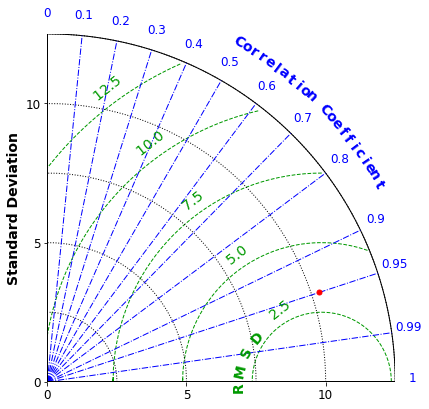

In [84]:
dataref = [2000, 2010, 2015, 2020, 2025, 2030]
datapred1 = [2001, 2012, 2012, 2027, 2023, 2031]

taylor_stats1 = sm.taylor_statistics(datapred1,dataref,'data')
# taylor_stats2 = sm.taylor_statistics(data.pred2,data.ref,'data')
# taylor_stats3 = sm.taylor_statistics(data.pred3,data.ref,'data')

# Store statistics in arrays
sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1]]) 
                 #taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1]])  
                  #taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1]])  
                  #taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])


sm.taylor_diagram(sdev,crmsd,ccoef)

# Write plot to file
plt.savefig('taylor1.png')

# Show plot
plt.show()

In [85]:
##load datasets



In [86]:
#refval
crid= infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
mon = infil[:,4]
day = infil[:,5]
lat_or = infil[:,6]
lon_or = infil[:,7]
lat = infil_cor[:,6]
lon = infil_cor[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
ox = infil[:,11]
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:, 20]
po4 = infil[:,21]
po4_qf = infil[:, 22]

dens = seawater.dens(S,T,P)
dic_conv=dic*dens/1000
alk_conv=alk*dens/1000

S_rs = S * 35.16504/35
S_psu= S_rs*35/35.16504

In [87]:
DIC_mod_2015 = DIC_2015['model_output']['mod_point'][:]
is_ref_2015 = DIC_2015['model_output']['mod_x'][:]
js_ref_2015 = DIC_2015['model_output']['mod_y'][:]

TA_mod_2015 = TA_2015['model_output']['mod_point'][:]
is_ref2_2015 = TA_2015['model_output']['mod_x'][:]
js_ref2_2015 = TA_2015['model_output']['mod_y'][:]

NO3_mod_2015 = NO3_2015['model_output']['mod_point'][:]
is_ref3_2015 = NO3_2015['model_output']['mod_x'][:]
js_ref3_2015 = NO3_2015['model_output']['mod_y'][:]

sal_mod_2015 = sal_2015['model_output']['mod_point'][:]
is_ref4_2015 = sal_2015['model_output']['mod_x'][:]
js_ref4_2015 = sal_2015['model_output']['mod_y'][:]

NameError: name 'DIC_2015' is not defined

In [ ]:
loc_tag = np.zeros_like(dic)
loc_tag[:] = 4

for w in range(0,len(loc_tag)):
    x = is_ref_2015[w]
    y = js_ref_2015[w]
    #jdf is 1
    if  (x <200) & (y>220) & (y<500) :
        loc_tag[w] = 1
        #n strait
    if  (y >= 550):
        loc_tag[w] = 2
        #central strait
    if (x> 150) & (y>380) & (y<550):
        loc_tag[w] = 3
        #4 is haro/puget
    if ((x>150) & (y>320) & (y<370)):
        loc_tag[w] =4


  
    #4 is haro/puget


In [ ]:
plt.plot(dic_compbl,DIC_mod_compbl,'ro')

In [ ]:
dataref = [2000, 2010, 2015, 2020, 2025, 2030]
datapred1 = [2001, 2012, 2012, 2027, 2023, 2031]



taylor_stats1 = sm.taylor_statistics(DIC_mod_compbl,dic_compbl,'data')
# taylor_stats2 = sm.taylor_statistics(data.pred2,data.ref,'data')
# taylor_stats3 = sm.taylor_statistics(data.pred3,data.ref,'data')

# Store statistics in arrays
sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1]]) 
                 #taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1]])  
                  #taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1]])  
                  #taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])


sm.taylor_diagram(sdev,crmsd,ccoef)

# Write plot to file
plt.savefig('taylor1.png')

# Show plot
plt.show()

In [ ]:
taylor_stats1 = sm.taylor_statistics(DIC_mod_compbl,dic_compbl,'data')
taylor_stats2 = sm.taylor_statistics(DIC_mod_compbl-50,dic_compbl,'data')


In [ ]:
sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1]]) 
                 #taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1]])  
                  #taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1]])  
                  #taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])


sm.taylor_diagram(sdev,crmsd,ccoef, markercolor ='b', alpha = 0.0)

sdev2 = np.array([taylor_stats2['sdev'][0], taylor_stats2['sdev'][1]]) 
                 #taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
crmsd2 = np.array([taylor_stats2['crmsd'][0], taylor_stats2['crmsd'][1]])  
                  #taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
ccoef2 = np.array([taylor_stats2['ccoef'][0], taylor_stats2['ccoef'][1]])  
                  #taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])

sm.taylor_diagram(sdev2,crmsd2,ccoef2, markercolor ='b', overlay = 'on', alpha = 0.0, )

In [ ]:
    sm.taylor_diagram(stats.taylor_stats1['sdev'], 
                      stats.taylor_stats1['crmsd'], 
                      stats.taylor_stats1['ccoef'], markercolor ='r', alpha = 0.0)

    '''
    Overlay the second dataset
    '''
    sm.taylor_diagram(sdev2,crmsd2,ccoef2, markercolor ='b', alpha = 0.0,
                      overlay = 'on', markerLabel = label)

In [ ]:
plt.close('all')

sm.taylor_diagram(sdev,crmsd,ccoef, markercolor ='r', alpha = 0.0)

'''
Overlay the second dataset
'''
#sm.taylor_diagram(sdev2,crmsd2,ccoef2, markercolor ='b', alpha = 0.0,
#                  overlay = 'on', markerLabel = label)

sm.taylor_diagram(sdev+20,crmsd,ccoef, markercolor ='r', overlay = 'on',alpha = 0.0)


In [ ]:
sdevp = np.std(dic_compbl)
print(sdevp)
# Calculate standard deviation of reference field w.r.t N (sigma_r)
sdevr = np.std(DIC_mod_compbl)
print(sdevr)
sdev = [sdevr, sdevp];

In [ ]:

  
'''
How to create a Taylor diagram with a legend plus suppressed axes titles
A fifth example of how to create a Taylor diagram given one set of
reference observations and multiple model predictions for the quantity.
This example is a variation on the fourth example (taylor4) where now a
legend is added, and axes titles are suppressed. Note that symbols are
used for the points when requesting a legend.
All functions in the Skill Metrics library are designed to only work with
one-dimensional arrays, e.g. time series of observations at a selected
location. The one-dimensional data are read in as dictionaries via a 
pickle file: ref['data'], pred1['data'], pred2['data'], 
and pred3['data']. The plot is written to a file in Portable Network 
Graphics (PNG) format.
The reference data used in this example are cell concentrations of a
phytoplankton collected from cruise surveys at selected locations and 
time. The model predictions are from three different simulations that
have been space-time interpolated to the location and time of the sample
collection. Details on the contents of the dictionary (once loaded) can 
be obtained by simply executing the following two statements
>> key_to_value_lengths = {k:len(v) for k, v in ref.items()}
>> print key_to_value_lengths
{'units': 6, 'longitude': 57, 'jday': 57, 'date': 57, 'depth': 57, 
'station': 57, 'time': 57, 'latitude': 57, 'data': 57}
Author: Peter A. Rochford
        Symplectic, LLC
        www.thesymplectic.com
Created on Dec 6, 2016
@author: prochford@thesymplectic.com
'''

import matplotlib.pyplot as plt
import numpy as np
import pickle
import skill_metrics as sm
from sys import version_info

def load_obj(name):
    # Load object from file in pickle format
    if version_info[0] == 2:
        suffix = 'pkl'
    else:
        suffix = 'pkl3'

    with open(name + '.' + suffix, 'rb') as f:
        return pickle.load(f) # Python2 succeeds

class Container(object): 
    
    def __init__(self, pred1, pred2, pred3, ref):
        self.pred1 = pred1
        self.pred2 = pred2
        self.pred3 = pred3
        self.ref = ref
        
if __name__ == '__main__':
    
    # Close any previously open graphics windows
    # ToDo: fails to work within Eclipse
    plt.close('all')
        
    # Read data from pickle file
    data = load_obj('taylor_data')

    # Calculate statistics for Taylor diagram
    # The first array element (e.g. taylor_stats1[0]) corresponds to the 
    # reference series while the second and subsequent elements
    # (e.g. taylor_stats1[1:]) are those for the predicted series.
    taylor_stats1 = sm.taylor_statistics(data.pred1,data.ref,'data')
    taylor_stats2 = sm.taylor_statistics(data.pred2,data.ref,'data')
    taylor_stats3 = sm.taylor_statistics(data.pred3,data.ref,'data')
    
    # Store statistics in arrays
    sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                     taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
    crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                      taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
    ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                      taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])

    # Specify labels for points in a cell array (M1 for model prediction 1,
    # etc.). Note that a label needs to be specified for the reference even
    # though it is not used.
    label = ['Non-Dimensional Observation', 'M1', 'M2', 'M3']
    
    '''
    Produce the Taylor diagram
    Label the points and change the axis options for SDEV, CRMSD, and CCOEF.
    Increase the upper limit for the SDEV axis and rotate the CRMSD contour 
    labels (counter-clockwise from x-axis). Exchange color and line style
    choices for SDEV, CRMSD, and CCOEFF variables to show effect. Increase
    the line width of all lines. Suppress axes titles and add a legend.
    For an exhaustive list of options to customize your diagram, 
    please call the function at a Python command line:
    >> taylor_diagram
    '''
    sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                      markerLabelColor = 'k', 
                      markerColor = 'k', markerLegend = 'on')

    #     sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
#                       markerLabelColor = 'k', 
#                       markerColor = 'k', markerLegend = 'on', 
#                       tickRMS = range(0,60,10), tickRMSangle = 110.0,
#                       colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
#                       titleRMS = 'off', tickSTD = range(0,80,20), 
#                       axismax = 60.0, colSTD = 'b', styleSTD = '-.', 
#                       widthSTD = 1.0, titleSTD = 'off', 
#                       colCOR = 'k', styleCOR = '--', widthCOR = 1.0, 
#                       titleCOR = 'off')

    # Write plot to file
    plt.savefig('taylor5.png')

    # Show plot
    plt.show()

